# 0 - Importar bibliotecas e funções 

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [21]:
def histplot(data, title=None, xlabel=None, ylabel=None, x=None, y=None, ax=False, nrows=1, ncols=1, figsize=(10, 5), bins='auto'):
  """Gráfico de frequência para a visualização de dados numéricos e categóricos

  Args:
      data (pd.DataFrame): base de dados
      title (str, optional): título do gráfico, opcional. Defaults to None.
      xlabel (str, optional): título do eixo x, opcional. Defaults to None.
      ylabel (str, optional): título do eixo y, opcional. Defaults to None.
      x (str, optional): feature da base de dados para o eixo x. Defaults to None.
      y (str, optional): feature da base de dados para o eixo y. Defaults to None.
      ax (bool, optional): determina se a impressão conterá múltiplos gráficos. Defaults to False.
      nrows (int, optional): quantidade de linhas. Defaults to 1.
      ncols (int, optional): quantidade de colunas. Defaults to 1.
      figsize (tuple, optional): tamanho da impressão. Defaults to (10, 5).
      bins (int, optional): quantidade de bins. Defaults to 10.

  Returns:
      sns.histplot: impressão do gráfico
  """   
  import matplotlib.pyplot as plt
  import seaborn as sns
  
  if ax is True:
    plt.figure(figsize=figsize)
    c = 1
    for x in data.columns:
      plt.subplot(nrows, ncols, c)
      sns.histplot(data[x], bins=bins).set_ylabel(ylabel)
      c += 1
    
    if title is not None:
      plt.suptitle(title)
  
  else:
    plt.figure(figsize=figsize)
    sns.histplot(data=data, x=x, y=y, bins=bins)
    
    if title is not None:
      plt.title(title)
    if xlabel is not None:
      plt.xlabel(xlabel)
    if ylabel is not None:
      plt.ylabel(ylabel)      

  return plt.show()

In [25]:
def corrplot(data, vmin= -1, vmax= 1, figsize=(10,7)):
    """Gráfico de correlação com paleta de cores do azul ao vermelho e anotações para melhor entendimento dos dados

    Args:
        data (pd.DataFrame): base de dados para realizar a correlação
        vmin (int, optional): valos mínimo de correlação. Defaults to -1.
        vmax(int, optional): valor máximo de correlação. Defaults to 1.

    Returns:
        sns.heatmap: impressão do gráfico
    """      
    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.figure(figsize=figsize)

    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    sns.heatmap(data = data.corr(), 
                cmap = cmap, 
                vmin = vmin, 
                vmax = vmax,
                annot=True)

    return plt.show()

In [54]:
def predict_table(y, y_pred, columns=['Real', 'Previsto'], residual=False):
    """Tabela de previsão e cálculo de resíduo do modelo

    Args:
        y (pd.DataFrame): variável resposta
        fit (.predict): predição do modelo ajustado dos regressores
        columns (list): nome das colunas Real e Previsto
        residual (bool, optional): cálculo do residual dos regressores. Defaults to False.

    Returns:
        pred(pd.DataFrame): base com predição do modelo ajustado
    """  
    
    import pandas as pd
    
    pred = pd.concat([y, pd.Series(y_pred)], axis=1)
    pred.columns = columns

    if residual is True:
        pred['Res'] = pred[columns[0]] - pred[columns[1]]

    return pred

In [73]:
def adj_quality(pred, index, form=False, reg=None):
    """Qualidade de ajuste do modelo com R² e RMSE

    Args:
        pred (pd.DataFrame): tabela de previsão do modelo

    Returns:
        adj(pd.DataFrame): cálculo de R² e RMSE do modelo
    """    
    import pandas as pd
    import numpy as np
    from sklearn import metrics

    
    if form is True:
        fo = "y = {:.3f} x + {:.3f}".format(reg.intercept_, reg.coef_[0])
        adj = pd.DataFrame({
        'R²': metrics.r2_score(pred.loc[:, pred.columns[0]], 
                               pred.loc[:, pred.columns[1]]),
        'MSE': metrics.mean_squared_error(pred.loc[:, pred.columns[0]], 
                                          pred.loc[:, pred.columns[1]]),
        'RMSE': np.sqrt(metrics.mean_squared_error(pred.loc[:, pred.columns[0]], 
                                                   pred.loc[:, pred.columns[1]])),
        'Fórmula': fo
        }, index=[index])
    
    else:
        adj = pd.DataFrame({
            'R²': metrics.r2_score(pred.loc[:, pred.columns[0]], 
                                pred.loc[:, pred.columns[1]]),
            'MSE': metrics.mean_squared_error(pred.loc[:, pred.columns[0]], 
                                            pred.loc[:, pred.columns[1]]),
            'RMSE': np.sqrt(metrics.mean_squared_error(pred.loc[:, pred.columns[0]], 
                                                    pred.loc[:, pred.columns[1]]))
        }, index=[index])
        
    return adj

# 1 - Regressão Linear Simples

Quando utilizamos os modelos de Regressão? Quando queremos prever uma variável contínua, isto é, um valor numérico.

Nesse exercício de hoje, iremos aprender um pouco mais sobre a biblioteca [scikit-learn](https://scikit-learn.org/stable/index.html) utilizando um dataset próprio dela para aplicarmos dentro do modelo de Regressão Linear.

Em linhas gerais, o objetivo do exercício é você desenvolver um modelo de Regressão Linear **SIMPLES** 
(Apenas uma variável de entrada X e uma de saída Y) para modelar a precificação de casas em Boston nos Estados Unidos. 

Neste exercício você irá:
- [ ] Importar os dados e criar o Dataframe;
- [ ] Realizar um EDA
- [ ] Escolher 3 atributos para utilizar como X do modelo
- [ ] Treinar o modelo de Regressão Linear simples para cada atributo e avaliar qual melhor modelo.

## Importar os dados

In [3]:
dataset = load_boston()

c:\Users\bruna\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [4]:
print(dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [37]:
boston = pd.DataFrame(dataset.data)
boston.columns = dataset.feature_names
boston['PRICE'] = pd.DataFrame(dataset.target)

## Análise Exploratória dos Dados

Você deve escolher quais serão as 3 melhores colunas para utilizarmos através do EDA. Não existem valores nulos.

Feature | Descrição                                                                    | Range         | Tipo
:------ | -----------------------------------------------------------------------      | :-----------: | ------
CRIM    | Taxa de criminalidade per capta por cidade                                   | 0.006 - 88.98 | Numérica
ZN      | Proporção de terrenos residenciais zoneados para lotes acima de 2300 m²      | 0.000 - 100.0 | Numérica
INDUS   | Proporção de acres de negócios não varejistas por cidade                     | 0.460 - 27.74 | Numérica
CHAS    | Se o imóvel está às margens do rio Charles                                   | 0 - 1         | Categórica  
NOX     | Concentração de óxidos nítricos                                              | 0.385 - 0.871 | Numérica
RM      | Quantidade média de quartos por habitação                                    | 3.561 - 8.780 | Numérica
AGE     | Proporção de unidades ocupadas pelos proprietários construídas antes de 1940 | 2.900 - 100.0 | Numérica
DIS     | Distâncias ponderadas para os cinco centros de emprego de Boston             | 1.129 - 12.13 | Numérica
RAD     | Índice de acessibilidade às rodovias radiais                                 | 1 - 24        | Numérica
TAX     | Taxa de imposto de propriedade de valor total (por $ 10.000)                 | 187 - 711     | Numérica
PTRATIO | Proporção aluno-professor por cidade                                         | 12.6 - 22.0   | Numérica
B       | 1000(Bk - 0.63)² Onde Bk é a proporção de pessoas negras por cidade          | 0.320 - 396.9 | Numérica
LSTAT   | % status mais baixo da população                                             | 1.730 - 37.97 | Numérica
PRICE   | Preço das casas                                                              | 5 - 50        | Target

In [38]:
boston.describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.9, 0.99]).T

,count,mean,std,min,5%,25%,50%,75%,90%,99%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.027910,0.082045,0.25651,3.677083,10.7530,41.37033,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.000000,0.00000,12.500000,42.5000,90.00000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,2.180000,5.190000,9.69000,18.100000,19.5800,25.65000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.000000,0.00000,0.000000,0.0000,1.00000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.409250,0.449000,0.53800,0.624000,0.7130,0.87100,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.314000,5.885500,6.20850,6.623500,7.1515,8.33500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,17.725000,45.025000,77.50000,94.075000,98.8000,100.00000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,1.461975,2.100175,3.20745,5.188425,6.8166,9.22277,12.1265
RAD,506.0,9.549407,8.707259,1.00000,2.000000,4.000000,5.00000,24.000000,24.0000,24.00000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,222.000000,279.000000,330.00000,666.000000,666.0000,666.00000,711.0000


In [39]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### Distribuição das variáveis

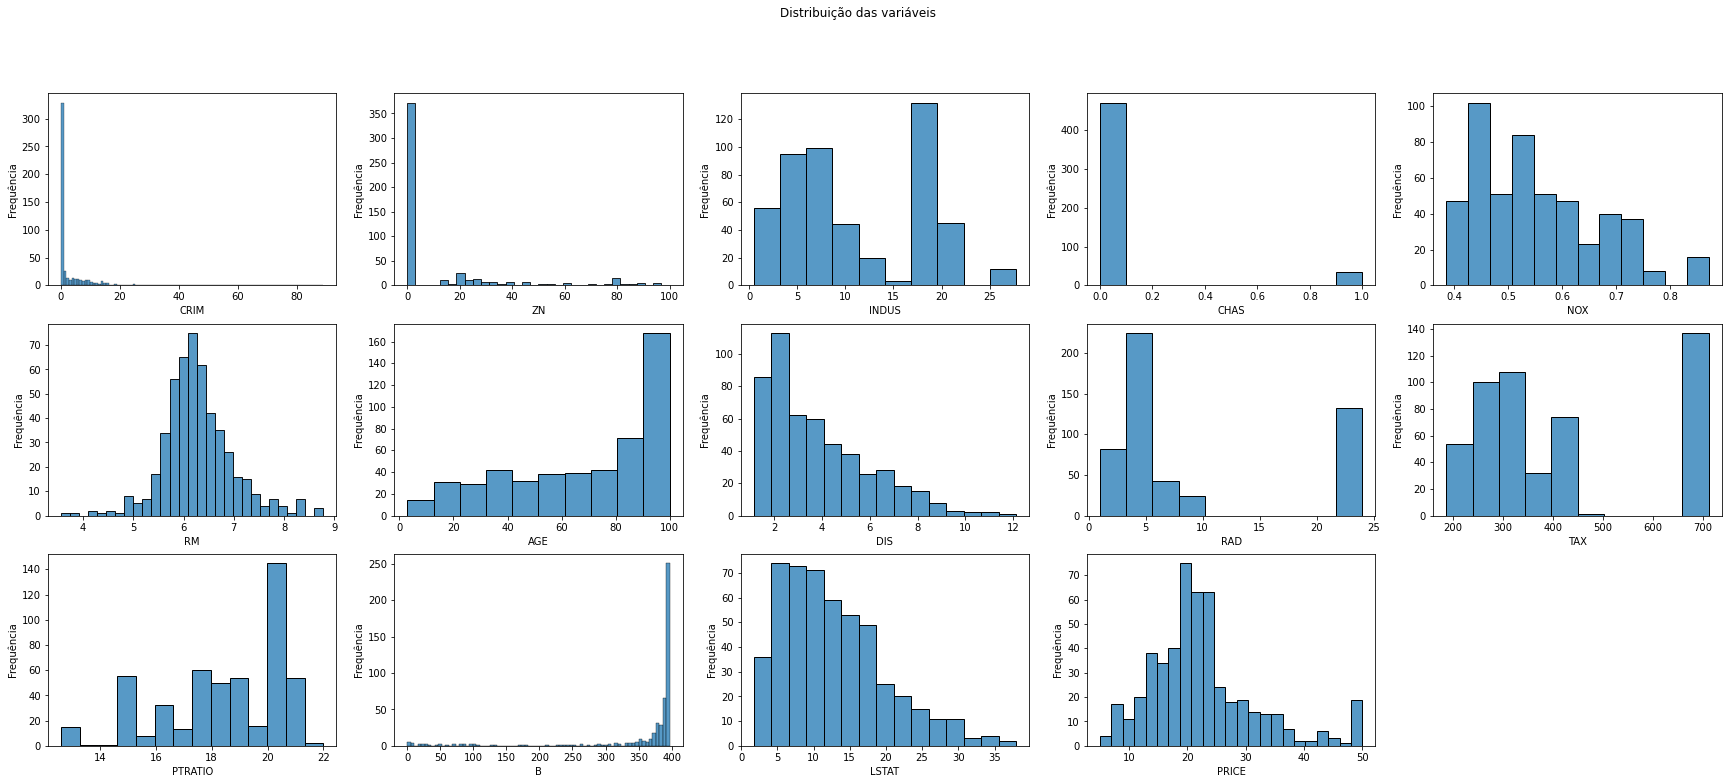

In [40]:
histplot(data=boston, 
         nrows=3, ncols=5, ax=True, 
         ylabel='Frequência', title='Distribuição das variáveis',
         figsize=(30,12))

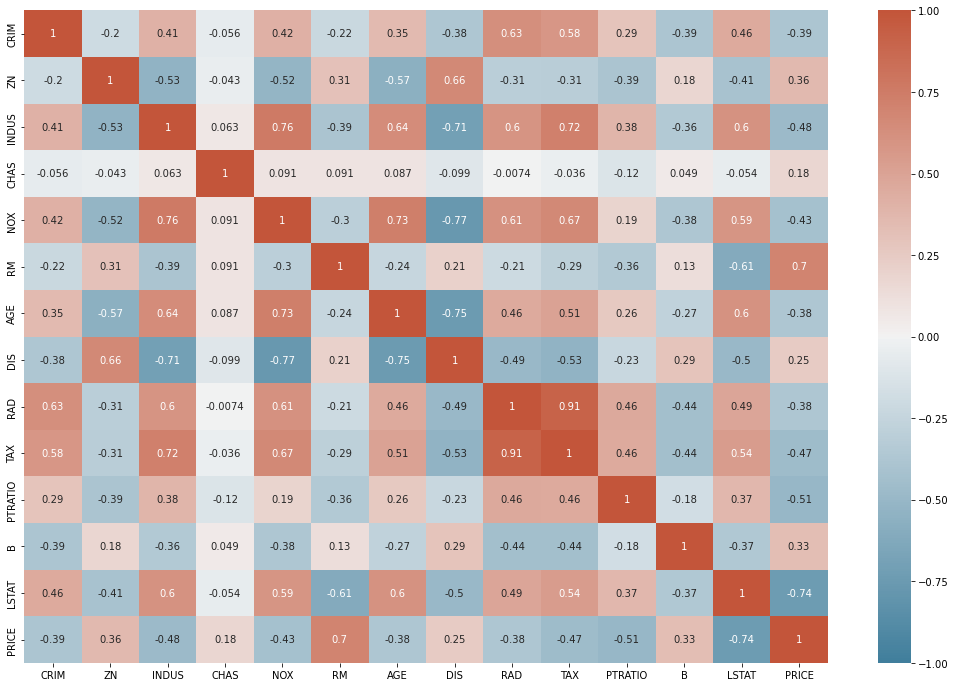

In [41]:
corrplot(boston, figsize=(18,12))

### Escolha dos atributos

Os atributos que tiveram maior correlação com a variável **Target**, foram:

Atributo | Corr
-------- | ----:
LSTAT    | -0.74
PTRATIO  | -0.51
RM       |  0.70

In [43]:
boston.corr()['PRICE'].abs().sort_values(ascending=False).head(4)

PRICE      1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
Name: PRICE, dtype: float64

### Gráfico de dispersão com os valores escolhidos

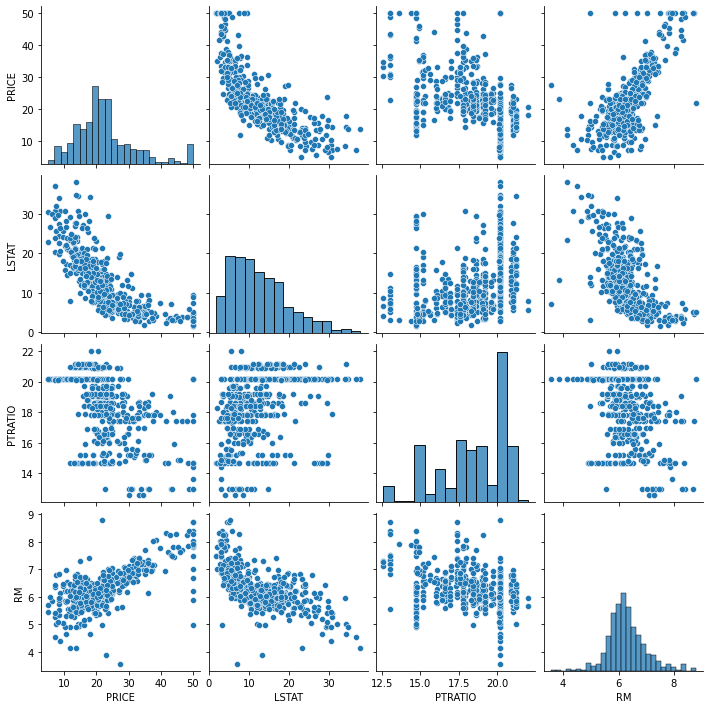

In [44]:
sns.pairplot(boston[['PRICE', 'LSTAT', 'PTRATIO', 'RM']])

## Dividir o dataset

In [47]:
x_Train, x_Test, y_Train, y_Test = train_test_split(boston[['LSTAT', 'PTRATIO', 'RM']], boston['PRICE'], test_size=0.2)

data = (x_Train, x_Test, y_Train, y_Test)

for d in data:
    d.reset_index(drop=True, inplace=True)

## Treinamento e validação dos modelos
Apenas modelos simples, verificando um X e um Y

### Treinar o modelo

In [50]:
regLSTAT = LinearRegression().fit(x_Train[['LSTAT']], y_Train)
regPTRATIO = LinearRegression().fit(x_Train[['PTRATIO']], y_Train)
regRM = LinearRegression().fit(x_Train[['RM']], y_Train)

In [59]:
regLSTAT.intercept_

34.372216966082014

### Testar o modelo

In [51]:
y_LSTAT = regLSTAT.predict(x_Test[['LSTAT']])
y_PTRATIO = regPTRATIO.predict(x_Test[['PTRATIO']])
y_RM = regRM.predict(x_Test[['RM']])

In [55]:
pred_LSTAT = predict_table(y=y_Test, y_pred=y_LSTAT, residual=True)
pred_LSTAT.head()

,Real,Previsto,Res
0,50.0,25.997284,24.002716
1,21.1,26.817801,-5.717801
2,12.5,16.103922,-3.603922
3,15.2,16.716952,-1.516952
4,8.7,9.426611,-0.726611


In [56]:
pred_PTRATIO = predict_table(y=y_Test, y_pred=y_PTRATIO, residual=True)
pred_PTRATIO.head()

,Real,Previsto,Res
0,50.0,18.612207,31.387793
1,21.1,18.612207,2.487793
2,12.5,18.612207,-6.112207
3,15.2,16.892677,-1.692677
4,8.7,18.612207,-9.912207


In [57]:
pred_RM = predict_table(y=y_Test, y_pred=y_RM, residual=True)
pred_RM.head()

,Real,Previsto,Res
0,50.0,18.693338,31.306662
1,21.1,20.129684,0.970316
2,12.5,23.392495,-10.892495
3,15.2,21.060649,-5.860649
4,8.7,21.149312,-12.449312


### Qualidade de ajuste

In [74]:
adj_quality(pred_LSTAT, 'LSTAT', form=True, reg=regLSTAT).append([adj_quality(pred_PTRATIO, 'PTRATIO', form=True, reg=regPTRATIO), 
                                                                  adj_quality(pred_RM, 'RM', form=True, reg=regRM)])

,R²,MSE,RMSE,Fórmula
LSTAT,0.480491,49.689609,7.049086,y = 34.372 x + -0.943
PTRATIO,0.203938,76.141166,8.725891,y = 62.030 x + -2.149
RM,0.425824,54.918392,7.410694,y = -33.396 x + 8.866


### Visualização do modelo

Text(0.5, 1.0, 'Avaliação da homoscedasticidade da previsão RM x PRICE')

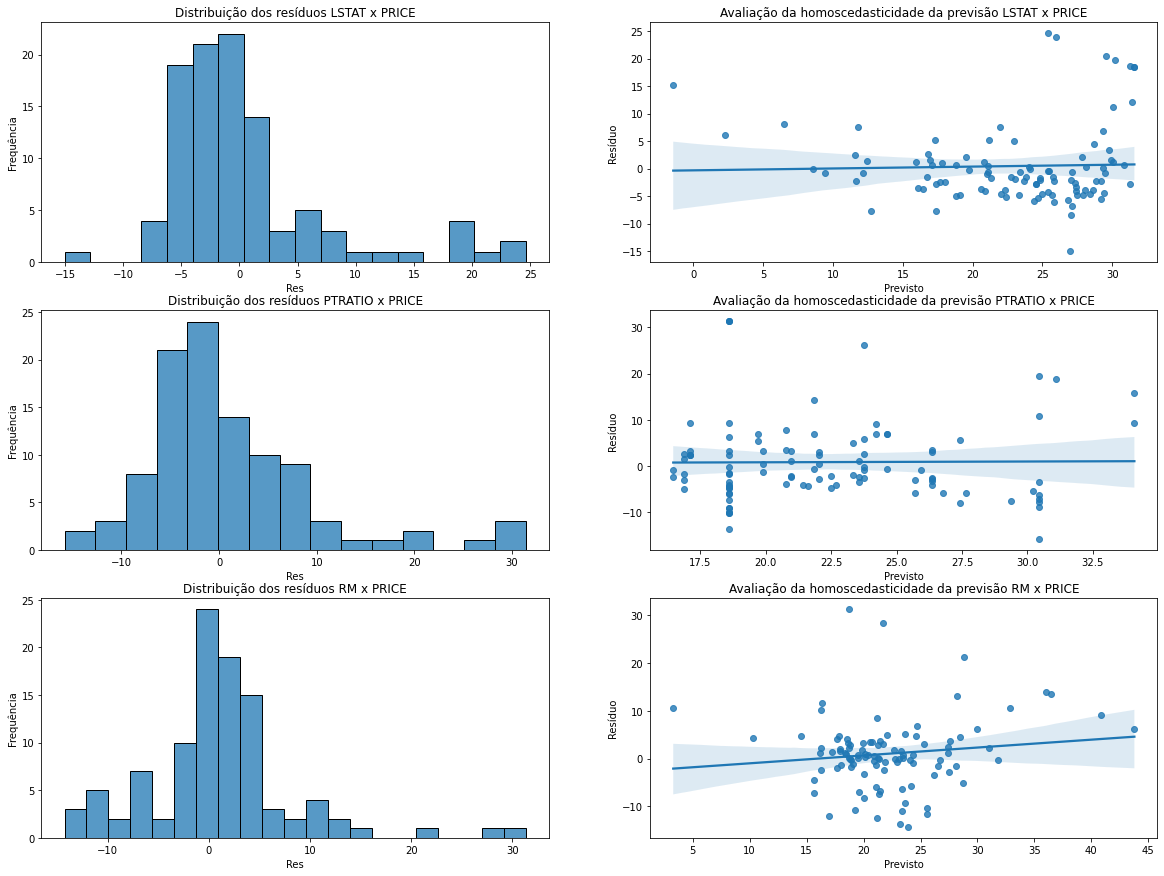

In [80]:
fig, axes = plt.subplots(3, 2, figsize=(20,15))

sns.histplot(data=pred_LSTAT, x='Res', ax=axes[0,0]).set_ylabel('Frequência')
axes[0,0].set_title('Distribuição dos resíduos LSTAT x PRICE')

sns.regplot(data=pred_LSTAT, x='Previsto', y='Res', ax=axes[0,1]).set_ylabel('Resíduo')
axes[0,1].set_title('Avaliação da homoscedasticidade da previsão LSTAT x PRICE')


sns.histplot(data=pred_PTRATIO, x='Res', ax=axes[1,0]).set_ylabel('Frequência')
axes[1,0].set_title('Distribuição dos resíduos PTRATIO x PRICE')

sns.regplot(data=pred_PTRATIO, x='Previsto', y='Res', ax=axes[1,1]).set_ylabel('Resíduo')
axes[1,1].set_title('Avaliação da homoscedasticidade da previsão PTRATIO x PRICE')


sns.histplot(data=pred_RM, x='Res', ax=axes[2,0]).set_ylabel('Frequência')
axes[2,0].set_title('Distribuição dos resíduos RM x PRICE')

sns.regplot(data=pred_RM, x='Previsto', y='Res', ax=axes[2,1]).set_ylabel('Resíduo')
axes[2,1].set_title('Avaliação da homoscedasticidade da previsão RM x PRICE')

### Qual o melhor modelo?

LSTAT